In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)


In [3]:
def trend(time, slope = 0):
    return slope*time

In [4]:
def seasonal_pattern(season_time):
    return np.where(season_time<0.1,
                   np.cos(season_time*7*np.pi),
                   1/np.exp(5*season_time))

In [5]:
def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

In [6]:
def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

In [7]:
time = np.arange(4*365+1, dtype='float32')
baseline = 10
series = trend(time, 0.1)
baseline = 1
amplitude = 40
slope=0.01
noise_level = 2

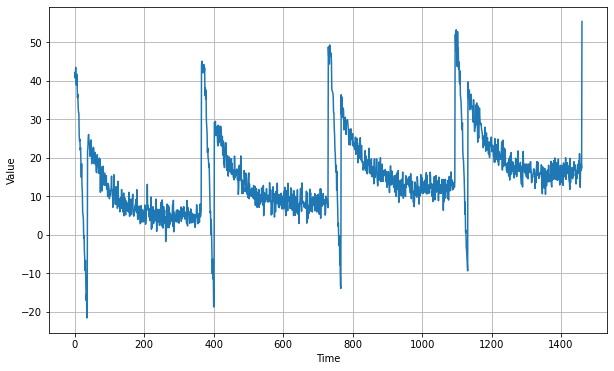

In [8]:
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

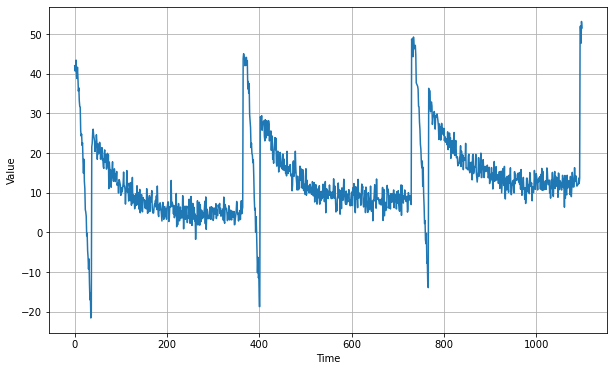

In [9]:
split_time = 1100
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time: ]
x_valid = series[split_time:]
plt.figure(figsize=(10,6))
plot_series(time_train, x_train)
plt.show()

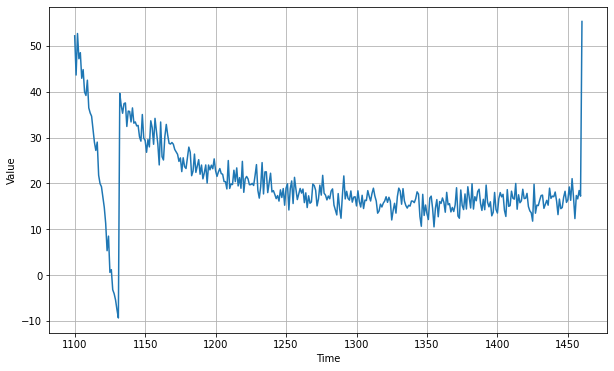

In [11]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plt.show()

# NAIVE FORECAST

In [12]:
naive_forecast = series[split_time-1:-1]

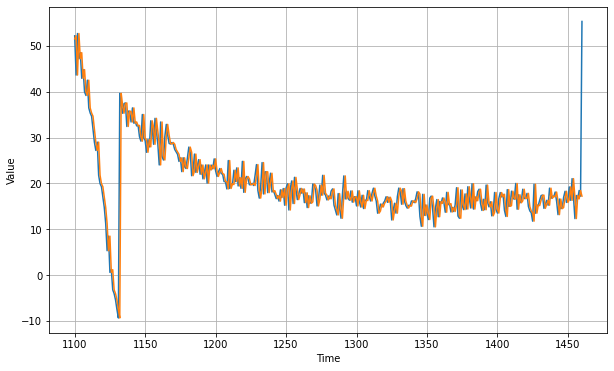

In [13]:
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

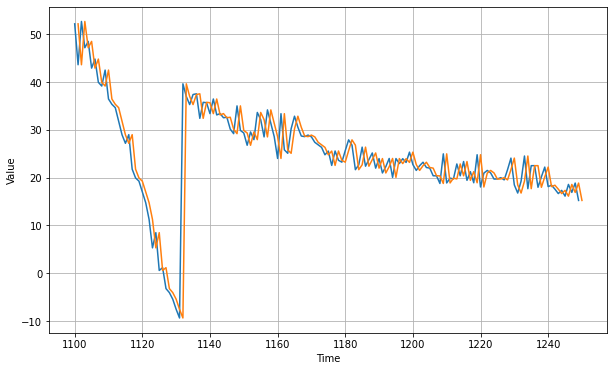

In [14]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start=0, end=150)
plot_series(time_valid, naive_forecast, start=1, end=151)

In [15]:
print(keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

19.578304
2.6011972


In [18]:
def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series)-window_size):
        forecast.append(series[time:time+window_size].mean())
    return np.array(forecast)

IndexError: invalid index to scalar variable.

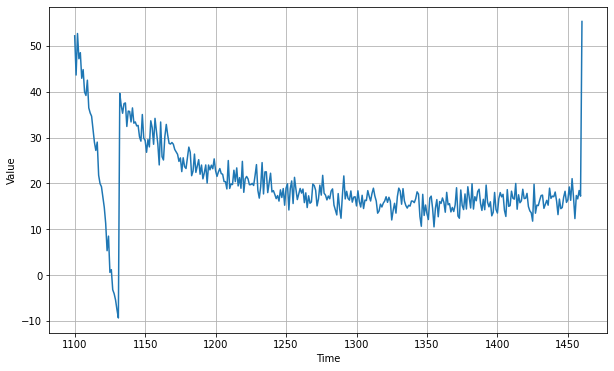

In [19]:
moving_avg = moving_average_forecast(series,30)[split_time-30]
plt.figure(figsize=(10,6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)